<a href="https://colab.research.google.com/github/catpixie-47/FDIP/blob/main/FDIP_1_123B1F047.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()



Saving flower.jpg to flower.jpg


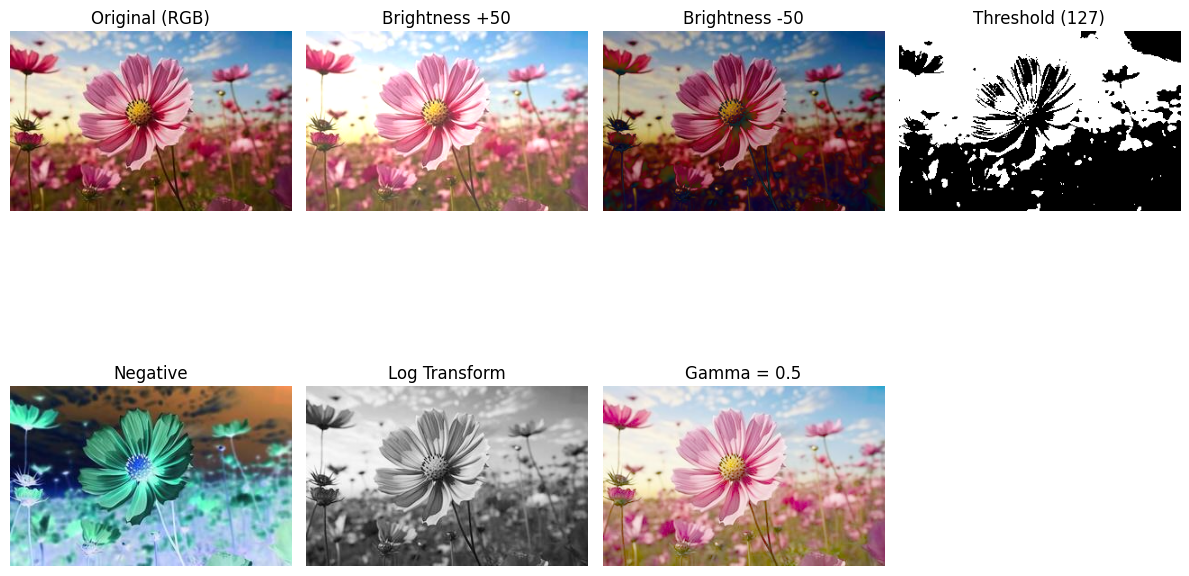

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img_bgr = cv2.imread('flower.jpg')
if img_bgr is None:
    raise FileNotFoundError("flower.jpg not found")

img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)


bright_img = cv2.convertScaleAbs(img_bgr, alpha=1.0, beta=50)
dark_img   = cv2.convertScaleAbs(img_bgr, alpha=1.0, beta=-50)


_, thresh_img = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)


negative_img = 255 - img_bgr

#log trans
img_float = img_gray.astype(np.float64) / 255.0
c = 255.0 / np.log(1.0 + np.max(img_float))
log_img = c * np.log(1.0 + img_float)
log_img = np.clip(log_img, 0, 255).astype(np.uint8)

#gamma law
gamma = 0.5
img_norm = img_bgr.astype(np.float64) / 255.0
gamma_img = np.clip(255.0 * (img_norm ** gamma), 0, 255).astype(np.uint8)

#output
images = [
    cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB),
    cv2.cvtColor(bright_img, cv2.COLOR_BGR2RGB),
    cv2.cvtColor(dark_img, cv2.COLOR_BGR2RGB),
    thresh_img,
    cv2.cvtColor(negative_img, cv2.COLOR_BGR2RGB),
    log_img,
    cv2.cvtColor(gamma_img, cv2.COLOR_BGR2RGB)
]
titles = [
    "Original (RGB)",
    "Brightness +50",
    "Brightness -50",
    "Threshold (127)",
    "Negative",
    "Log Transform",
    f"Gamma = {gamma}"
]


plt.figure(figsize=(12, 8))
n = len(images)
cols = 4
rows = int(np.ceil(n / cols))
for i in range(n):
    plt.subplot(rows, cols, i + 1)
    im = images[i]
    # Choose cmap only for grayscale arrays
    if im.ndim == 2:
        plt.imshow(im, cmap='gray')
    else:
        plt.imshow(im)
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
